In [383]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [384]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [385]:
train_generator = train_datagen.flow_from_directory(
    'data_flipped/training_set', 
    target_size=(120, 120),    
    batch_size=15,
    color_mode='grayscale', 
    class_mode='binary')       

validation_generator = validation_datagen.flow_from_directory(
    'data_flipped/validation_set', 
    target_size=(120, 120),      
    batch_size=15,
    color_mode='grayscale', 
    class_mode='binary')       
  
test_generator = test_datagen.flow_from_directory(
    'data_flipped/test_set',      
    target_size=(120, 120),       
    batch_size=15,
    color_mode='grayscale', 
    class_mode='binary',          
    shuffle=False)                

Found 420 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [386]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(120, 120, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))  
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))  # Add dropout for regularization
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))  # Add dropout for regularization

# hidden layer
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))  # Add dropout for regularization

# hidden layer
model.add(Dense(20, activation='relu'))

# output layer
model.add(Dense(1, activation='sigmoid'))

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')  # Changed to 'binary_crossentropy'

In [387]:
# Assuming you have a test_generator for your test data
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size)

# Convert probabilities to binary labels
predicted_labels = (predictions > 0.5).astype(int)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [388]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

print(f"Test accuracy: {test_accuracy * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7311 - loss: 0.6784
Test accuracy: 55.00%


In [389]:
print(train_generator.class_indices)

{'hemmorhage_data': 0, 'non_hemmorhage_data': 1}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


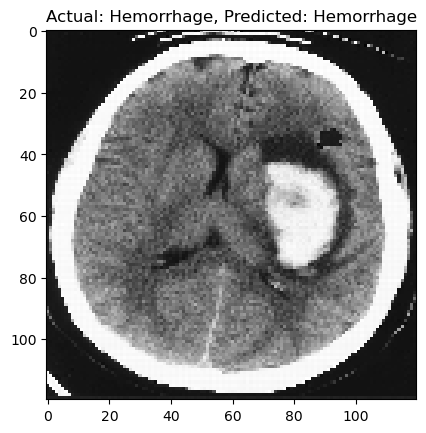

In [390]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels from the test generator
test_images, test_labels = next(test_generator)

# Select an image and its label
index = 3
image = test_images[index]
label = test_labels[index]

# Make a prediction on the selected image
prediction = model.predict(np.expand_dims(image, axis=0))

# Determine the predicted class
predicted_class = 'Hemorrhage' if prediction[0][0] < 0.5 else 'Non-Hemorrhage'

# Display the image
plt.imshow(image.squeeze(), cmap='gray')  # Use 'squeeze' to remove the channel dimension for grayscale images
plt.title(f'Actual: {"Hemorrhage" if label == 0 else "Non-Hemorrhage"}, Predicted: {predicted_class}')
plt.show()